In [664]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import linalg
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate Data
We will simulate:
* Positively-skewed income data using gamma distribution
* Positively-skewed accomodation data ising binomial distribution
* Positively-skewed outcome data (conversion customer flag)

In [665]:
# set sim hyperparameters
sim_size = int(1e4)
random_seed = 42

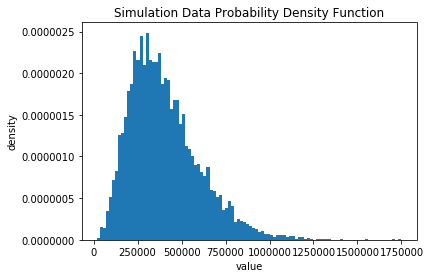

In [666]:
# continuous variable (e.g. income)
dist1 = stats.gamma.rvs(a=4, loc=10, scale=1e5, size=sim_size, random_state=random_seed).astype(int)
dist1 = np.round(a=dist1, decimals=-3)

plt.title('Simulation Data Probability Density Function')
plt.xlabel('value')
plt.ylabel('density')
plt.hist(dist1, bins=100, density=True)
plt.show()

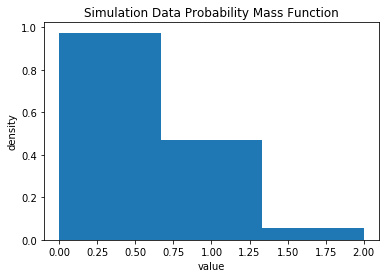

In [667]:
# categorical variable (e.g. accomodation)
dist2 = stats.binom.rvs(n=2, p=0.2, size=sim_size, random_state=random_seed)

plt.title('Simulation Data Probability Mass Function')
plt.xlabel('value')
plt.ylabel('density')
plt.hist(dist2, bins=3, density=True)
plt.show()

In [668]:
# merge several distributions
X = np.append(dist1.reshape(-1, 1), dist2.reshape(-1, 1), axis=1)

In [669]:
# produce df from distributions
features_names_ = ['income', 'accomodation']

pd.DataFrame(X, columns=features_names_).head()

,income,accomodation
0,470000,0
1,341000,1
2,324000,1
3,324000,0
4,760000,0


Find covariance matrix such that $C \cdot C^T=r$

In [670]:
# covariating variables
y = stats.binom.rvs(n=1, p=0.15, size=sim_size, random_state=random_seed)

data = np.append(X, y.reshape(-1, 1), axis=1)

method = 'cholesky' #eigenvectors

r = np.array([[10, 1, 1],
              [1, 10, 1],
              [1, 1, 10]])

c = linalg.cholesky(r, lower=True)

res = np.dot(c, data.T).T

In [671]:
stats.describe(res)

DescribeResult(nobs=10000, minmax=(array([60083.2755432 ,  6008.32755432,  6008.32755432]), array([5530823.6276345 ,  553082.36276345,  553082.36276345])), mean=array([1275118.89635438,  127513.11076358,  127512.45436309]), variance=array([3.93450301e+11, 3.93450653e+09, 3.93450399e+09]), skewness=array([0.98080671, 0.98080693, 0.98080573]), kurtosis=array([1.43009462, 1.43009072, 1.43008929]))

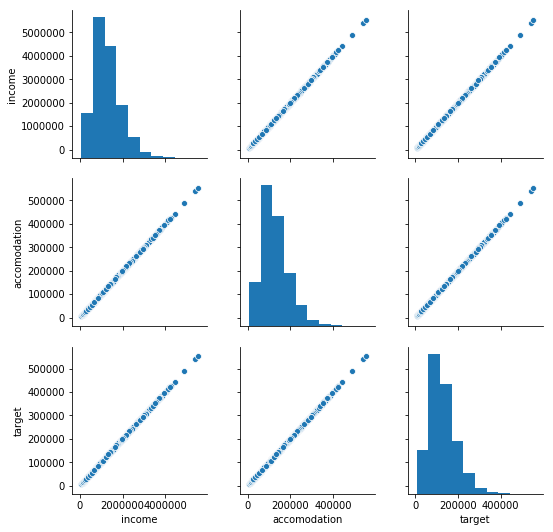

In [672]:
to_plot = pd.DataFrame(res, columns=features_names_+['target'])

sns.pairplot(to_plot)

In [673]:
data

array([[470000,      0,      0],
       [341000,      1,      1],
       [324000,      1,      0],
       ...,
       [266000,      1,      1],
       [619000,      0,      0],
       [629000,      0,      0]])

In [674]:
to_plot.head()

,income,accomodation,target
0,1.486271e+06,148627.050028,148627.050028
1,1.078337e+06,107836.814638,107837.087648
2,1.024578e+06,102460.942616,102458.082228
3,1.024578e+06,102457.796189,102457.796189
4,2.403331e+06,240333.102173,240333.102173


In [675]:
y.shape

(10000,)

In [676]:
X.T.shape

(2, 10000)

In [677]:
np.cov(y, X.T)

array([[1.23845345e-01, 3.30118612e+02, 1.26315752e-01],
       [3.30118612e+02, 3.93450301e+10, 1.76688989e+03],
       [1.26315752e-01, 1.76688989e+03, 3.12909681e-01]])

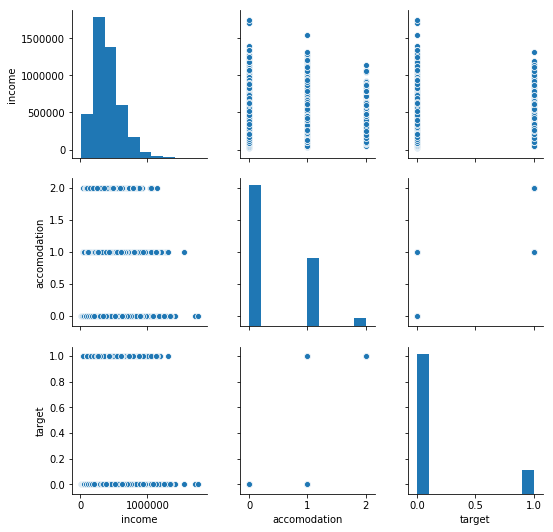

In [678]:
to_plot = pd.DataFrame(data, columns=features_names_+['target'])

sns.pairplot(to_plot)

In [679]:
xx = dist1
yy = dist2
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.9
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 1000).T

In [680]:
m[1] = np.round(a=m[1], decimals=0)

In [681]:
m

array([[5.06378469e+05, 4.75361227e+05, 4.42818709e+05, ...,
        3.10239191e+05, 3.53890429e+05, 3.73377415e+05],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

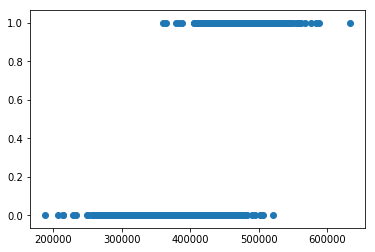

In [682]:
plt.scatter(m[0], m[1])

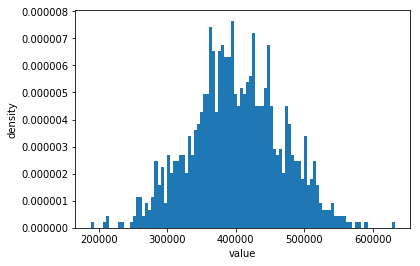

In [683]:
plt.xlabel('value')
plt.ylabel('density')
plt.hist(m[0], bins=100, density=True)
plt.show()

In [689]:
mu = [0, 0, 0, 0]
cov = [
       [1, 0.5, 0, 0],
       [0.5, 1, 0, 0],
       [0.5, 1, 0, 0],
       [0.5, 1, 0, 0],
      ]

m = stats.multivariate_normal.rvs(mean=mu, cov=cov, size=sim_size, random_state=random_seed).T
# m[1] = np.round(a=m[1], decimals=0)

/anaconda3/lib/python3.7/site-packages/scipy/stats/_multivariate.py:652: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


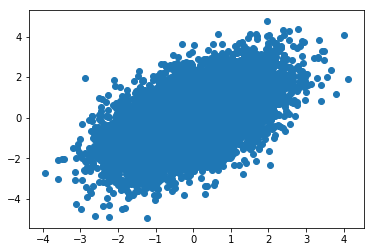

In [690]:
plt.scatter(m[0], m[1])

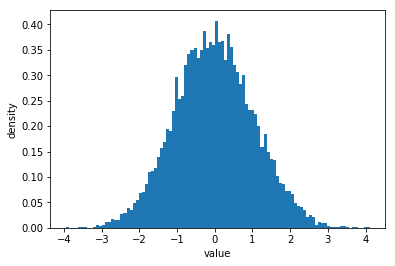

In [691]:
plt.xlabel('value')
plt.ylabel('density')
plt.hist(m[0], bins=100, density=True)
plt.show()

In [693]:
m.shape

(4, 10000)

In [687]:
# pd.melt(to_plot, value_vars=to_plot.columns)

In [688]:
# variable dependent on covariating variables

# Model and Predict